In [ ]:
import nltk
nltk.download("book")
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

#Bigramas

In [2]:
#Creamos una lista de los bigramas
bigramas = list(bigrams(text1))
fdist = FreqDist(bigramas)

In [3]:
#Los bigramas mas comunes
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

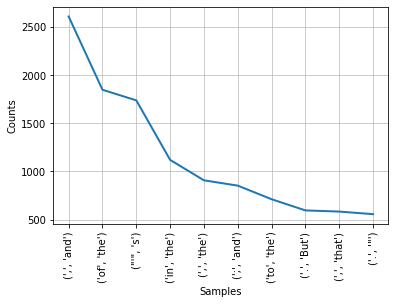

In [4]:
fdist.plot(10)

#Filtrado de bi-gramas

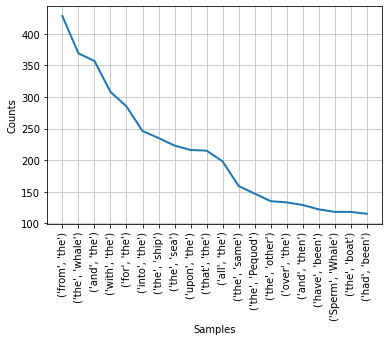

In [5]:
#Filtramos la lista de bigramas que ya teniamos para solo tener los bigramas que sean utiles y tambien graficamos los 20 que mas se repiten
threshold = 2
filtered_bigrams = [bigram for bigram in bigramas if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

#Tri-gramas

In [6]:
from nltk.util import ngrams
md_trigrams = list(ngrams(text1, 3))
fdist = FreqDist(md_trigrams)
fdist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

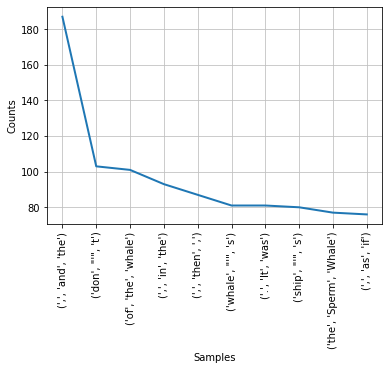

In [7]:
fdist.plot(10)

#Colocaciones

In [8]:
md_bigrams = list(bigrams(text1))

threshold = 2
filtered_bigras = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_bigram_dist = FreqDist(filtered_bigrams)

filtered_words = [word for word in text1 if len(word)>threshold]
filtered_words_dist = FreqDist(filtered_words)

df = pd.DataFrame()
df["bi_grams"] = list(set(filtered_bigrams))
df["word_0"] = df["bi_grams"].apply(lambda x: x[0])
df["word_1"] = df["bi_grams"].apply(lambda x: x[1])
df["bi_gram_freq"] = df["bi_grams"].apply(lambda x: filtered_bigram_dist[x])
df["word_0_freq"] = df["word_0"].apply(lambda x: filtered_words_dist[x])
df["word_1_freq"] = df["word_1"].apply(lambda x: filtered_words_dist[x])

In [9]:
df

bi_grams     word_0  ... word_0_freq  word_1_freq
0            (the, success)        the  ...       13721            5
1        (barnacled, hulls)  barnacled  ...           3            5
2          (entire, strain)     entire  ...          55           12
3       (decline, meddling)    decline  ...           3            1
4      (playful, allurings)    playful  ...           3            1
...                     ...        ...  ...         ...          ...
67937         (decent, man)     decent  ...           6          508
67938            (met, his)        met  ...          18         2459
67939            (the, ass)        the  ...       13721            2
67940  (your, metropolitan)       your  ...         240            3
67941       (were, created)       were  ...         680            6

[67942 rows x 6 columns]

#Pointwise Mutual Information

In [10]:
df["PMI"] = df[["bi_gram_freq", "word_0_freq", "word_1_freq"]].apply(lambda x: np.log2(x.values[0]/(x.values[1]*x.values[2])), axis=1)
df["log(bi_gram_freq)"] = df["bi_gram_freq"].apply(lambda x: np.log2(x))
df


bi_grams     word_0  ...        PMI  log(bi_gram_freq)
0            (the, success)        the  ... -14.481064           1.584963
1        (barnacled, hulls)  barnacled  ...  -3.906891           0.000000
2          (entire, strain)     entire  ...  -9.366322           0.000000
3       (decline, meddling)    decline  ...  -1.584963           0.000000
4      (playful, allurings)    playful  ...  -1.584963           0.000000
...                     ...        ...  ...        ...                ...
67937         (decent, man)     decent  ... -11.573647           0.000000
67938            (met, his)        met  ... -14.433781           1.000000
67939            (the, ass)        the  ... -14.744098           0.000000
67940  (your, metropolitan)       your  ...  -9.491853           0.000000
67941       (were, created)       were  ... -11.994353           0.000000

[67942 rows x 8 columns]

In [11]:
df.sort_values(by="PMI", ascending= False)

bi_grams        word_0  ...        PMI  log(bi_gram_freq)
60364         (sequential, issues)    sequential  ...   0.000000                0.0
60893              (WAS, ATTACKED)           WAS  ...   0.000000                0.0
43130              (gaseous, Fata)       gaseous  ...   0.000000                0.0
52001             (seminal, germs)       seminal  ...   0.000000                0.0
52059  (magniloquent, ascriptions)  magniloquent  ...   0.000000                0.0
...                            ...           ...  ...        ...                ...
22092                   (man, the)           man  ... -22.732783                0.0
11226                  (some, the)          some  ... -22.919024                0.0
29775                   (one, the)           one  ... -23.540138                0.0
42291                   (the, not)           the  ... -23.851315                0.0
7055                    (the, but)           the  ... -23.864336                0.0

[67942 rows x 8 columns]

In [12]:
fig = px.scatter(x = df["PMI"].values, y = df["log(bi_gram_freq)"], 
                 color = df["PMI"]+df["log(bi_gram_freq)"], hover_name = df["bi_grams"].values, 
                 width = 600, height = 600, labels = {"x": "PMI", "y": "Log(Bigram Frequency"})
fig.show()

#Medidas pre-construidas en NLTK

In [13]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures
finder = BigramCollocationFinder.from_words(text1)

In [14]:
finder.apply_freq_filter(20)#20 Es la frecuancia con la que tienen que salir en el texto como minimo 
bigramas_filtrados = finder.nbest(bigram_measures.pmi, 20)#El 15 es el numero de palabras que muestra
bigramas_filtrados 

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other'),
 (',"', 'cried'),
 ('let', 'us'),
 ('on', 'board'),
 ('at', 'least'),
 ('sperm', 'whale'),
 ('cried', 'Stubb'),
 ('an', 'instant'),
 ('be', 'sure'),
 ('Captain', 'Ahab'),
 ('once', 'more')]

#Textos en español

In [15]:
nltk.download("cess_esp")
corpus = nltk.corpus.cess_esp.sents()
#Covertimos el archivo en una lista, en vez de la lista de listas que venia por defecto
flatten_corpus = [w for l in corpus for w in l]

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.


In [16]:
print(flatten_corpus[:10])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',']


In [17]:
#Calculamos colocaciones
finder = BigramCollocationFinder.from_documents(corpus)
finder.apply_freq_filter(10)
finder.nbest(bigram_measures.pmi, 10)

[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]